In [2]:
import Pkg 

In [ ]:
Pkg.add("AbstractAlgebra")

In [ ]:
Pkg.add("Random")

In [ ]:
Pkg.add("Permutations")

In [ ]:
Pkg.add("CairoMakie")

In [1]:
using AbstractAlgebra, Random, Permutations
b=2
F = GF(b)
m = 3
s = 2
ρ = m 
t = m - ρ 
N = b^m

8

In [2]:
badic = collect(Iterators.product(fill(0:b-1, m)...))[:]

8-element Vector{Tuple{Int64, Int64, Int64}}:
 (0, 0, 0)
 (1, 0, 0)
 (0, 1, 0)
 (1, 1, 0)
 (0, 0, 1)
 (1, 0, 1)
 (0, 1, 1)
 (1, 1, 1)

In [3]:
function norm_coord(v,b)
    v_1 = 0.0
    bf = float(b)
    for i in eachindex(v)
        v_1 += v[i] * bf^(-i)
    end
    return v_1
end


norm_coord (generic function with 1 method)

In [4]:
using Test
@test norm_coord([1 1 0 1],2) == 13/16

Test Passed

In [5]:
# norm_coord( AbstractAlgebra.lift.( C_2*collect(badic[4]) ),2)  # you need to convert Tuples to vectors matrix mult...
# C_r2*collect(badic[4])

# Hi Vishnu:   Ok, it is kind of logical: If you compute in a finite field, you need to apply the map from Fq to R to make this computation
# work. This map is called 'lift'. So, you need to apply lift to the vector you want to compute with.

In [6]:
function point_gen(C,n,b)
    v = [norm_coord(AbstractAlgebra.lift.(c*n),b) for c in C]  # you need to apply lift here! Like this? yes! Yay now the plot looks correct! Juhu! 
    return v
end

point_gen (generic function with 1 method)

In [7]:
function gen_all_points(C,b)
    badic = collect(Iterators.product(fill(0:b-1, m)...))[:]
    pts = [point_gen(C,collect(n),b) for n in badic]
    return pts
end

gen_all_points (generic function with 1 method)

In [8]:
vol(z) = prod(z)
vol_h(z, pts) = count( all(p .< z) for p in pts ) / length(pts)
δ(z,pts) = vol_h(z, pts) - vol(z)

δ (generic function with 1 method)

In [9]:
function is_NNLD(c_z, s, pts)
    NNLD = true
    for i in 1:c_z 
        z = rand(s)
        if δ(z,pts) < 0
            @show z
            NNLD = false
            break
        end
    end
    return NNLD
end


is_NNLD (generic function with 1 method)

In [10]:

C_1 = [[1 0 0];[0 1 0]; [0 0 1]]
C_2 = [[1 1 1]; [1 1 0]; [1 0 0]]
C_1, C_2 = F.(C_1), F.(C_2)
C = [C_1,C_2]

2-element Vector{Matrix{AbstractAlgebra.GFElem{Int64}}}:
 [1 0 0; 0 1 0; 0 0 1]
 [1 1 1; 1 1 0; 1 0 0]

In [11]:
gen_all_points(C,b)
pts = gen_all_points(C,b)

8-element Vector{Vector{BigFloat}}:
 [0.0, 0.0]
 [0.5, 0.875]
 [0.25, 0.75]
 [0.75, 0.125]
 [0.125, 0.5]
 [0.625, 0.375]
 [0.375, 0.25]
 [0.875, 0.625]

In [12]:
#Fibo sequence is not NNLD!
is_NNLD(50, 2, pts)

z = [0.8684197715577446, 0.738606960249178]


false

In [13]:
using CairoMakie
set_theme!(theme_ggplot2())

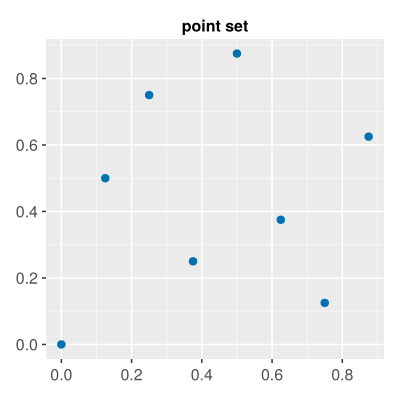

In [14]:
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1,1], title = "point set")
scatter!( Point2.(pts) )

# ax = Axis(fig[1,2], title = "reduced point set")
# scatter!( Point2.(pts_r) )
fig

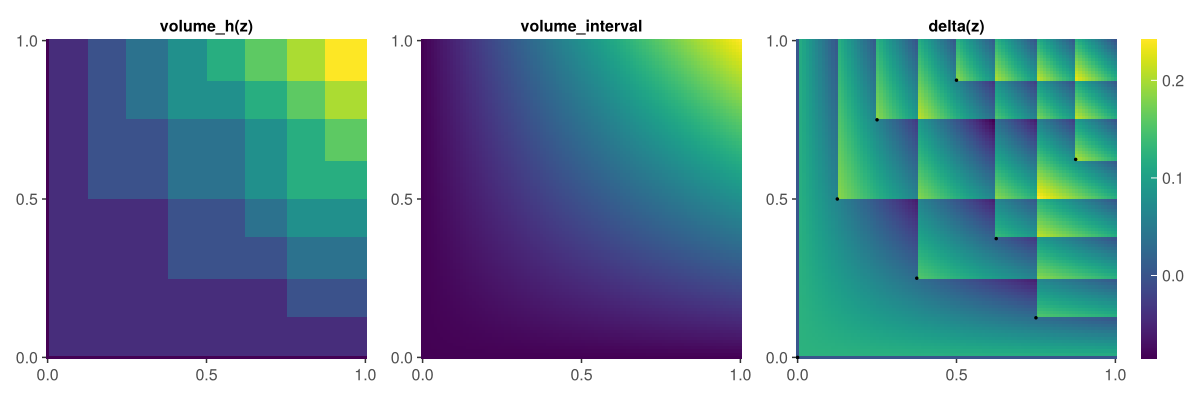

In [15]:
x = LinRange(0,1,100)
y = LinRange(0,1,100)
fig = Figure(resolution = (1200, 400))
ax = Axis(fig[1,1], title="volume_h(z)")
A = [vol_h((a,b),pts[1:end]) for a in x, b in y]
heatmap!(x,y, A )

ax = Axis(fig[1,2], title = "volume_interval")
B = [a*b for a in x, b in y]
heatmap!(x,y, B )

ax = Axis(fig[1,3], title = "delta(z)")
hm = heatmap!(x,y, A-B )
scatter!( Point2.(pts), color = :black, markersize = 5 )
Colorbar(fig[1,4], hm)
fig